In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from pathlib import Path

In [18]:
sea_levels_path = 'cleanedsealevel.csv'
migration = 'census-county-to-county-migration.csv'
censuspop = 'census-population.xlsx'
zillow = 'zprop.csv'
odnpop = 'ODN_Population_20240129.csv'

In [19]:
sea_levels= pd.read_csv(sea_levels_path)
migrations= pd.read_csv(migration)
pvals = pd.read_csv(zillow)

In [20]:
#Information:
#https://www.zillow.com/research/data/
#Home Values (Single Family Homes) sorted geographically by county
pvals

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,StateCodeFIPS,MunicipalCodeFIPS,2000-01-31,...,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31
0,3101,0,Los Angeles County,county,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",6,37,208453.080524,...,804802.541310,801021.907927,803549.432152,810316.308955,821345.498959,834884.912014,848342.362212,859321.896663,867528.209805,872695.048413
1,139,1,Cook County,county,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",17,31,146516.213789,...,289927.709298,291803.759952,293392.842156,295102.848442,297014.709471,299235.790651,300970.253144,302316.658271,303244.721991,303884.658933
2,1090,2,Harris County,county,TX,TX,"Houston-The Woodlands-Sugar Land, TX",48,201,109838.425455,...,279006.326508,278393.382584,278375.563868,279008.874039,279781.713606,280585.152352,280917.629885,280960.340996,280717.100572,280439.814641
3,2402,3,Maricopa County,county,AZ,AZ,"Phoenix-Mesa-Chandler, AZ",4,13,144914.772450,...,454472.317136,453596.967878,454557.524068,456670.719212,459517.807325,462532.532365,465036.625805,467246.154538,469054.475581,470036.354079
4,2841,4,San Diego County,county,CA,CA,"San Diego-Chula Vista-Carlsbad, CA",6,73,224488.557842,...,870406.450342,874328.164080,881971.721215,892253.850546,904473.400076,917054.125155,929238.112429,939224.545274,946028.121656,949603.992802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3071,846,3206,Banner County,county,NE,NE,"Scottsbluff, NE",31,7,NaN,...,286495.485328,288963.144908,293404.646124,297982.937945,303221.568679,308324.293100,312531.028460,316194.328152,318241.617684,318700.497331
3072,1648,3207,Daggett County,county,UT,UT,NaN,49,9,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,307588.203336,306735.806453,306030.886931
3073,1432,3208,Thomas County,county,NE,NE,NaN,31,171,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,129634.834614,129173.045077
3074,2794,3212,McPherson County,county,NE,NE,"North Platte, NE",31,117,NaN,...,238631.791013,239907.502218,243713.320855,247472.453259,251510.668543,255606.446130,259303.491520,262310.137508,264384.559066,266216.985756


In [21]:
#Selecting counties of interest from Zillow data
nccount = pvals.loc[pvals['RegionName'].isin(['Hyde County', 'Dare County', 'Carteret County'])]
nccount

#nccountv = nccount.pivot_table(index=['Date', 'TradeGroup'], columns='Fund',
#                     values='Alpha', aggfunc='first').reset_index()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,StateCodeFIPS,MunicipalCodeFIPS,2000-01-31,...,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31
785,2179,795,Carteret County,county,NC,NC,"Morehead City, NC",37,31,142161.979276,...,416182.791479,419556.568991,423113.493787,426811.906971,429457.550626,431382.113236,432299.767262,432950.261204,434123.560856,435713.676949
1259,147,1289,Dare County,county,NC,NC,"Kill Devil Hills, NC",37,55,NaN,...,574092.684255,577206.119244,579817.553162,582493.661961,583991.182741,585138.295709,586254.098029,587719.406820,589182.202710,590238.182811
2829,186,2920,Hyde County,county,NC,NC,NaN,37,95,NaN,...,216634.657175,218951.343970,221953.705964,224834.487455,226756.128984,227621.269010,228316.655097,228844.971225,228859.267823,227095.109608


In [22]:
#Info provided on documentation:
#https://tidesandcurrents.noaa.gov/sltrends/sltrends_station.shtml?id=8652587
#Data collected by NOAA Station 8652587, Oregon Inlet Marina, North Carolina.
#Monthly mean sea levels with the average seasonal cycle removed. 
#The values are in meters relative to the most recent Mean Sea Level datum established by CO-OPS.
#Column values are the Year; Month; Monthly Mean; Relative Sea Level Trend Line; Higher 95% Confidence Interval; and Lower 95% Confidence Interval.
sea_levels


,Year,Month,Monthly_MSL,Linear_Trend,High_Conf.,Low_Conf.
0,1977,5,-0.109,-0.082,-0.049,-0.114
1,1977,6,-0.032,-0.081,-0.049,-0.114
2,1977,7,-0.100,-0.081,-0.048,-0.113
3,1977,8,-0.053,-0.080,-0.048,-0.113
4,1977,9,-0.077,-0.080,-0.048,-0.112
...,...,...,...,...,...,...
364,2023,7,0.217,0.168,0.188,0.149
365,2023,8,0.152,0.169,0.188,0.149
366,2023,9,0.221,0.169,0.189,0.150
367,2023,10,0.224,0.170,0.189,0.150


Year
 Month
 Monthly_MSL
 Linear_Trend
 High_Conf.
 Low_Conf.


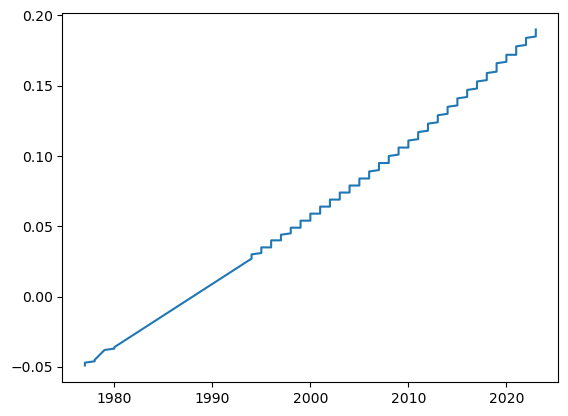

In [23]:
for col in sea_levels.columns:
    print(col)


plt.plot(sea_levels['Year'], sea_levels[' High_Conf.'])
#sea_levels.plot(x='Year', y='', ylabel = 'Monthly Sea Level Change (m)', title = 'Sea Level Change Over Time')

In [24]:
#Download local copy of Realtor_county.csv
#To run Kayla's code below 
census = Path("census_county.csv")
census_df = pd.read_csv(census)

reduced_census = census_df[["Area Name", "Year", "Net Migration"]]

cleaned_df = reduced_census.loc[(census_df['Area Name']=='Carteret County') | 
                                 (census_df['Area Name']=='Dare County')| 
                                 (census_df['Area Name']=='Hyde County')]


cleaned_df

prop_value = Path("realtor_county.csv")
prop_value_df = pd.read_csv(prop_value)
prop_value_reduced = prop_value_df[['month_date_yyyymm', 'county_name', 
                                    'average_listing_price', 'total_listing_count' ]]
prop_value_reduced
prop_value_reduced.set_index('county_name') 
cleaned_prop_df = prop_value_reduced.loc[(prop_value_reduced['county_name']=='carteret, nc') | 
                                 (prop_value_reduced['county_name'] == 'dare, nc')| 
                                 (prop_value_reduced['county_name']=='hyde, nc')]

 
cleaned_prop_df
cleaned_prop_df.set_index('county_name') 

FileNotFoundError: [Errno 2] No such file or directory: 'realtor_county.csv'